In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
rcParams['figure.figsize'] = (14, 7) 
rcParams['axes.spines.top'] = False 
rcParams['axes.spines.right'] = False

In [4]:

class SimpleLinearRegression:
    def __init__(self):
        self.b0 = None 
        self.b1 = None
    
    def fit(self, X, y):
        """
        Used to calculate slope and intercept coefficients.
        :param X: array, single feature 
        :param y: array, true values 
        :return: None
        """
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y))) 
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
        
    def predict(self, X):
        """
        Makes predictions using the simple line equation.
        :param X: array, single feature 
        :return: None  
        """   
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X
    

### Testing

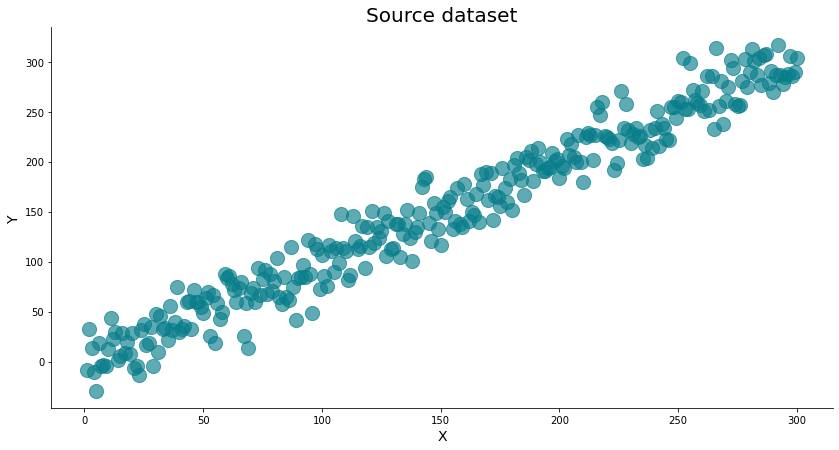

In [6]:
X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65) 
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

For validation sake, we'll split the dataset into training and testing parts

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


You can now initialize and train the model, and afterwards make predictions

In [10]:
model = SimpleLinearRegression() 
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [11]:
model.b0, model.b1

(-3.5170837783608135, 1.0219248804797427)

In [12]:
#These are the predictions
preds


array([204.95559184, 269.33685931, 152.83742294,   6.70216503,
       235.61333825, 228.45986409, 197.80211768, 108.89465307,
         2.6144655 , 176.34169519, 239.70103778,  55.75455929,
       220.28446505,  43.49146072, 183.49516935, 223.35023969,
       292.84113156, 213.13099088, 148.74972341, 166.12244638,
        77.21498178, 112.9823526 , 251.96413634, 252.98606122,
       103.78502867,  40.42568608, 284.66573252, 298.97268084,
       157.94704734, 240.72296266,  14.87756407, 165.1005215 ,
        31.22836216,  22.03103823, 217.21869041, 119.11390188,
         4.65831527,  89.47808035,  44.5133856 ,  72.10535738,
        92.54385499,  75.17113202, 289.77535692,  58.82033393,
        76.1930569 ,  61.88610857, 236.63526313, 231.52563873,
       110.93850284, 233.56948849, 181.45131959, 144.66202389,
       241.74488754,  74.14920714, 301.0165306 , 281.59995788,
        96.63155451,  91.52193011, 193.71441815,  23.05296311])

In [13]:
y_test

array([206.57965008, 255.49272956, 160.68201911,  12.71428198,
       225.97027708, 233.55719455, 208.88875067, 110.70271956,
        18.66412896, 193.96441103, 231.22231295,  50.00184224,
       225.849969  ,  72.01027601, 188.55923076, 218.56615734,
       269.44635927, 228.28717461, 133.02121329, 139.2202217 ,
        70.61248838, 120.86117389, 260.90711157, 259.41800102,
        89.48056767,  60.03324736, 300.189604  , 287.75257141,
       137.57754192, 213.91829259,  19.15097224, 167.50747773,
        33.86977359,  37.95589764, 254.64658563, 114.87957738,
        -3.22594519,  84.77336089,  59.5588786 ,  66.16465346,
       121.09913212,  67.92299719, 307.26640934,  85.47323122,
        87.0873892 ,  59.50206801, 202.47437649, 218.95928884,
        86.78082368, 233.42320325, 196.61629366, 138.44603033,
       233.08357367,  91.13103723, 285.50648673, 274.67545591,
       112.56057853,  85.0277061 , 191.02793253,  16.98982341])

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)


14.941281910012036

### Visualize the Best-Fit line 

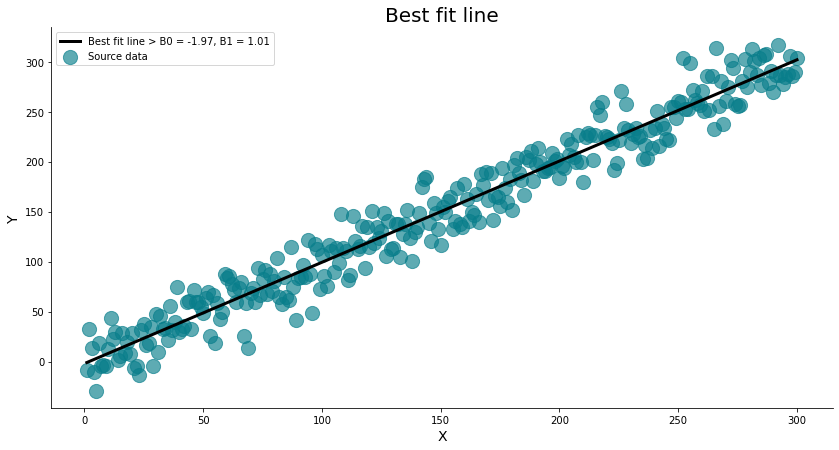

In [16]:
model_all = SimpleLinearRegression() 
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()


### Comparison with Scikit-Learn 

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:

sk_model = LinearRegression() 
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train) 
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))
sk_model.intercept_, sk_model.coef_


(-3.517083778360842, array([1.02192488]))

In [20]:
rmse(y_test, sk_preds)


14.941281910012039